In [1]:
#Session 13 Pt.2

In [2]:
################################################################################################################################

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , accuracy_score

In [2]:
df = pd.read_csv('D:/Route AI & ML/Datasets/XGBOOST_Data.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [4]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [5]:
df.drop(columns = ['Unnamed: 0' , 'id'] , axis = 1 , inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df['Gender'].value_counts()

Gender
Female    13172
Male      12804
Name: count, dtype: int64

In [8]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [9]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [10]:
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [11]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [12]:
gender_map = {"Male" : 1 , "Female" : 0}

In [13]:
travel_map = {"Business travel" : 1 , "Personal Travel" : 0}

In [14]:
customer_map = {"Loyal Customer" : 1 , "disloyal Customer" : 0}

In [15]:
class_map = {"Eco" : 2 , "Business" : 1 , "Eco Plus" : 0}

In [16]:
satisfaction_map = {"satisfied" : 1 , "neutral or dissatisfied" : 0}

In [17]:
df.Gender = df.Gender.map(gender_map)
df['Class'] = df['Class'].map(class_map)
df['Type of Travel'] = df['Type of Travel'].map(travel_map)
df['satisfaction'] = df['satisfaction'].map(satisfaction_map)
df['Customer Type'] = df['Customer Type'].map(customer_map)

In [18]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [19]:
y = df.satisfaction
x = df.drop('satisfaction' , axis = 1)

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
def evaluate_model(actual , prediction):
    accuracy_score_model = accuracy_score(actual , prediction)
    classification_report_model = classification_report(actual , prediction)
    return accuracy_score_model , classification_report_model

In [23]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNeighbors Classifier" : KNeighborsClassifier(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "XGB Classifier" : XGBClassifier()
}

In [24]:
model_list = []

In [32]:
for i in range(len(list(models))):
    
    model = list(models.values())[i]
    model.fit(x_train , y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Train_accuracy , Train_classification_report_model = evaluate_model(y_train , y_train_pred)
    Test_accuracy , Test_classification_report_model = evaluate_model(y_test , y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Training Preformance : ')
    print('Train_accuracy_score_model', Train_accuracy)
    print('Train_classification_report_model', Train_classification_report_model)
    print("\n")
    print('Model Training Preformance : ')
    print('Test_accuracy_score_model', Test_accuracy)
    print('Test_classification_report_model', Test_classification_report_model)
    print("\n")

Logistic Regression
Model Training Preformance : 
Train_accuracy_score_model 0.8725732827366222
Train_classification_report_model               precision    recall  f1-score   support

           0       0.87      0.90      0.89     10162
           1       0.87      0.84      0.85      8021

    accuracy                           0.87     18183
   macro avg       0.87      0.87      0.87     18183
weighted avg       0.87      0.87      0.87     18183



Model Training Preformance : 
Test_accuracy_score_model 0.8652636981906839
Test_classification_report_model               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4411
           1       0.86      0.83      0.84      3382

    accuracy                           0.87      7793
   macro avg       0.86      0.86      0.86      7793
weighted avg       0.87      0.87      0.86      7793



KNeighbors Classifier
Model Training Preformance : 
Train_accuracy_score_model 0.9412088214266072
Train_

In [33]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,52,1,2,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,1,1,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,1,2,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,1,1,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,1,2,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [4]:
#Session 14

In [5]:
################################################################################################################################

In [27]:
#!pip install yellowbrick

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer , silhouette_visualizer
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('D:/Route AI & ML/Datasets/data.csv')

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df.drop(['id' , 'Unnamed: 32' , 'diagnosis'],axis = 1 , inplace = True)

In [11]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
columns = df.columns.tolist()
print(columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [15]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [16]:
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [18]:
pca_model = PCA()
pca_model.fit(scaled_df)

PCA()

C:\Users\10\AppData\Local\Temp\ipykernel_2300\779446263.py:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,8,1)


Text(0, 0.5, 'Variance')

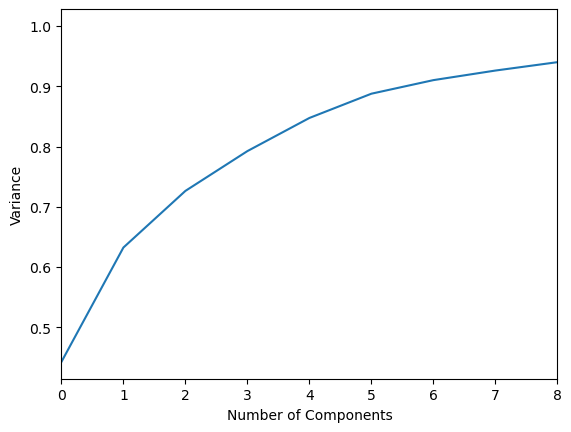

In [22]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel("Number of Components")
plt.ylabel("Variance")

In [23]:
pca_model = PCA(n_components = 8)
pca_data = pca_model.fit_transform(scaled_df)
pca_data

array([[ 9.19283683,  1.94858307, -1.12316618, ...,  1.41142565,
         2.15937185, -0.39844227],
       [ 2.3878018 , -3.76817174, -0.52929267, ...,  0.02865556,
         0.01335719,  0.24101642],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.54145129,
        -0.66816798,  0.0973953 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273052, ..., -0.53444737,
        -0.19275824,  0.34188934],
       [10.37479406,  1.67201011, -1.87702934, ...,  0.5679373 ,
         0.22308267, -0.28026534],
       [-5.4752433 , -0.67063679,  1.49044307, ...,  1.61783843,
         1.69895289,  1.04631781]])

In [24]:
pca_data.shape

(569, 8)

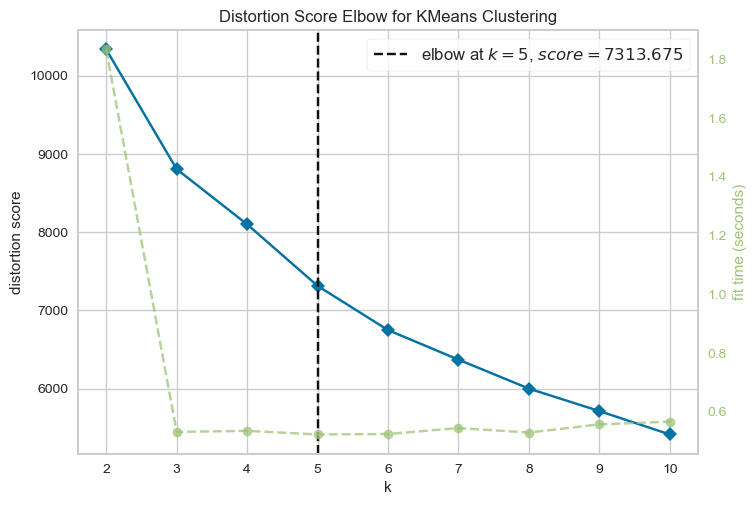

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
#Elbow Visualizer
elbow_method = KElbowVisualizer(KMeans() , k = 10)
elbow_method.fit(pca_data)
elbow_method.show()

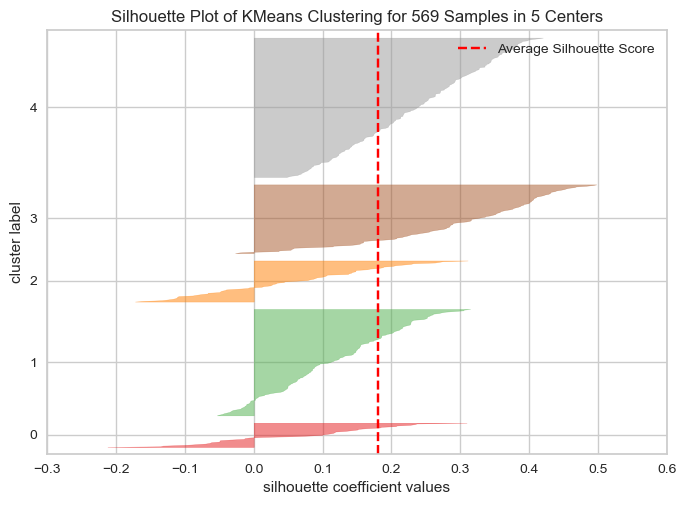

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
model = KMeans(5)
visualizer = silhouette_visualizer(model , pca_data , colore = 'yellowbrick')
visualizer.fit(pca_data)
visualizer.show()

In [41]:
#Elbow Method 
scores = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(pca_data)
    scores.append(kmeans_model.inertia_)

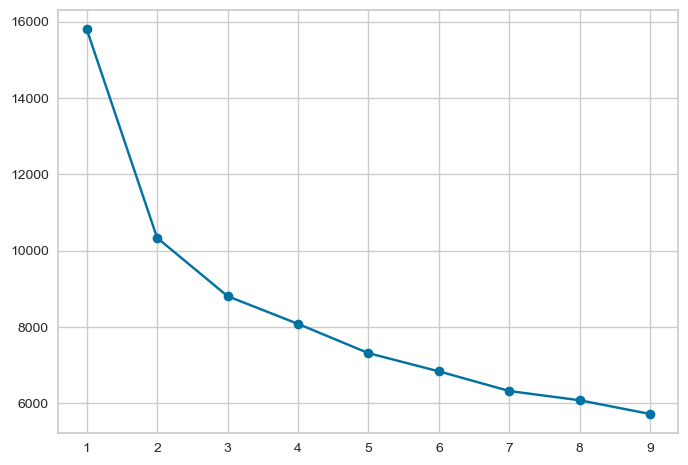

In [42]:
plt.plot(k_range , scores , marker = 'o')

In [46]:
#Silhouette Method 
scores = []
silhouette = []
k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(pca_data)
    y_pred = kmeans_model.predict(pca_data)
    scores.append(kmeans_model.inertia_)
    silhouette.append(silhouette_score(pca_data , y_pred))
    
    print("k = " , k )
    print("Silhouette Score :%0.4f"%silhouette_score(pca_data , y_pred))

k =  2
Silhouette Score :0.3651
k =  3
Silhouette Score :0.3332
k =  4
Silhouette Score :0.3052
k =  5
Silhouette Score :0.1814
k =  6
Silhouette Score :0.1797
k =  7
Silhouette Score :0.1756
k =  8
Silhouette Score :0.1815
k =  9
Silhouette Score :0.1627


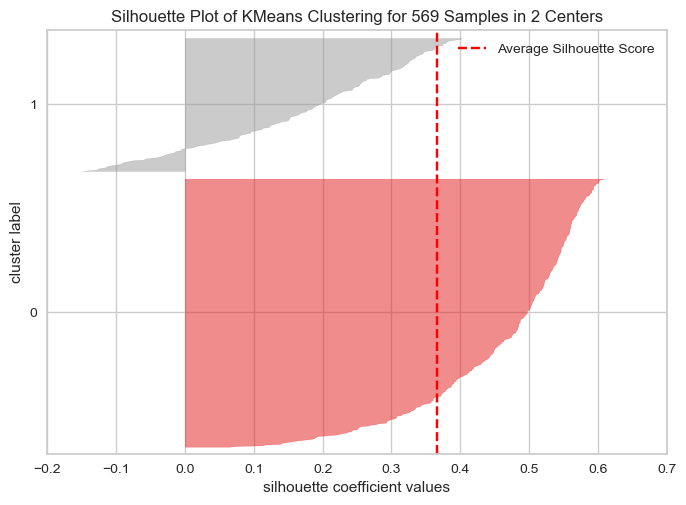

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
model = KMeans(2)
visualizer = silhouette_visualizer(model , pca_data , colore = 'yellowbrick')
visualizer.fit(pca_data)
visualizer.show()

In [47]:
kmeans_model = KMeans(n_clusters = 2)
kmeans_model.fit(pca_data)
y_pred = kmeans_model.predict(pca_data)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [49]:
df['cluster'] = y_pred
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [100]:
################################################################################################################################

In [82]:
df = pd.read_csv('D:/Route AI & ML/Datasets/credit card.csv')

In [83]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [84]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [85]:
df.drop(['CUST_ID'],axis = 1 , inplace = True)

In [86]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [87]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(), inplace = True)

In [88]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean(), inplace = True)

In [89]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [90]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [91]:
pca_model = PCA()
pca_model.fit(scaled_df)

PCA()

Text(0, 0.5, 'Variance')

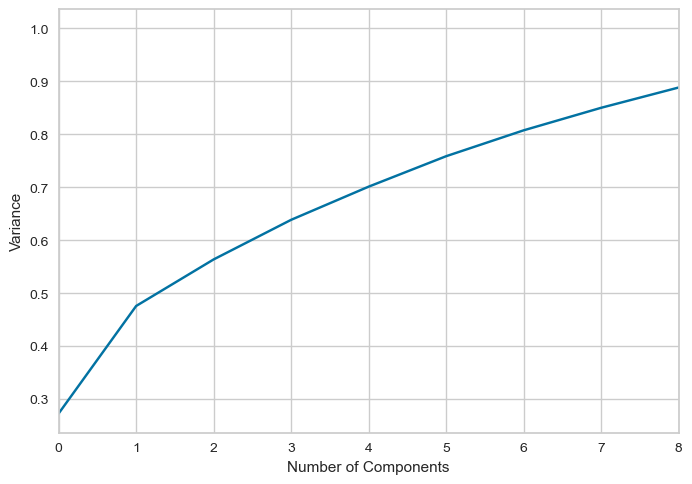

In [92]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel("Number of Components")
plt.ylabel("Variance")

In [93]:
pca_model = PCA(n_components = 8)
pca_data = pca_model.fit_transform(scaled_df)
pca_data

array([[-1.68222026, -1.07645061,  0.48850652, ...,  0.05062893,
         0.82914441, -0.03930321],
       [-1.1382949 ,  2.50647666,  0.60121233, ..., -1.13684066,
        -0.37450703,  0.1324107 ],
       [ 0.96968401, -0.3835203 ,  0.10237138, ..., -0.21722246,
        -1.57325769, -0.16954839],
       ...,
       [-0.92620364, -1.8107856 , -0.47472306, ...,  2.97694806,
        -1.36982289, -0.3459341 ],
       [-2.33655167, -0.65796601,  0.97472512, ...,  3.17438039,
        -0.9305112 ,  0.14807661],
       [-0.55642216, -0.40046712,  1.01519557, ...,  3.75329147,
        -1.4140955 , -0.37647329]])

In [94]:
pca_data.shape

(8950, 8)

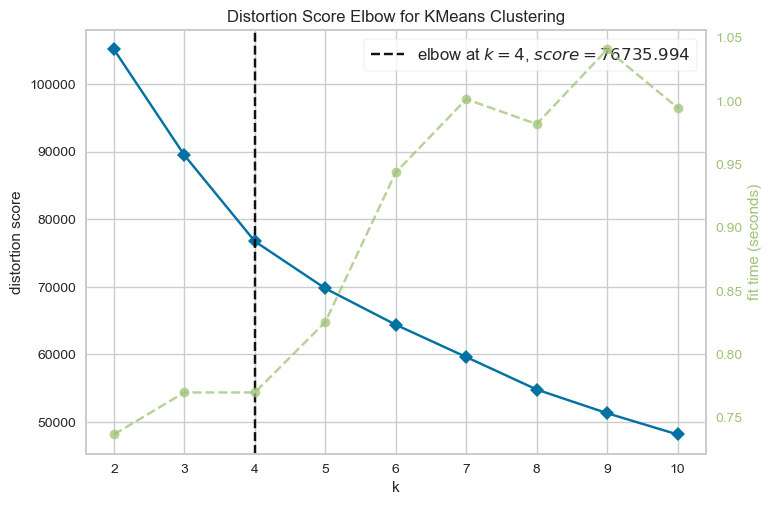

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
#Elbow Visualizer
elbow_method = KElbowVisualizer(KMeans() , k = 10)
elbow_method.fit(pca_data)
elbow_method.show()

In [96]:
#Silhouette Method 
scores = []
silhouette = []
k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(pca_data)
    y_pred = kmeans_model.predict(pca_data)
    scores.append(kmeans_model.inertia_)
    silhouette.append(silhouette_score(pca_data , y_pred))
    
    print("k = " , k )
    print("Silhouette Score :%0.4f"%silhouette_score(pca_data , y_pred))

k =  2
Silhouette Score :0.2396
k =  3
Silhouette Score :0.2755
k =  4
Silhouette Score :0.2365
k =  5
Silhouette Score :0.2289
k =  6
Silhouette Score :0.2462
k =  7
Silhouette Score :0.2383
k =  8
Silhouette Score :0.2444
k =  9
Silhouette Score :0.2507


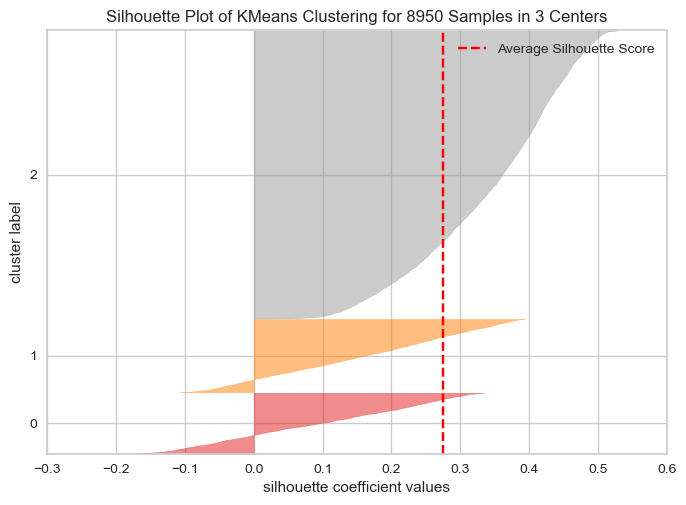

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [97]:
model = KMeans(3)
visualizer = silhouette_visualizer(model , pca_data , colore = 'yellowbrick')
visualizer.fit(pca_data)
visualizer.show()

In [98]:
kmeans_model = KMeans(n_clusters = 2)
kmeans_model.fit(pca_data)
y_pred = kmeans_model.predict(pca_data)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
df['cluster'] = y_pred
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [1]:
###############################################################################

In [2]:
#Session 14

In [52]:
#!pip install tensorflow
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 495.5 kB/s eta 0:01:18
   ---------------------------------------- 0.1/38.6 MB 939.4 kB/s eta 0:00:41
   ---------------------------------------- 0.2/38.6 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.3/38.6 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.4/38.6 MB 1.6 MB/s eta 0:00:24
    --------------------------------------- 0.5/38.6 MB 1.6 MB/s eta 0:00:24
    --------------------------------------- 0.6/38.6 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.7/38.6 MB 1.8 MB/s eta 0:00:21
    ---------------

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.utils import to_categorical
import cv2

In [4]:
mnist_data = tf.keras.datasets.mnist

In [5]:
(x_train, y_train) , (x_test, y_test) = mnist_data.load_data()

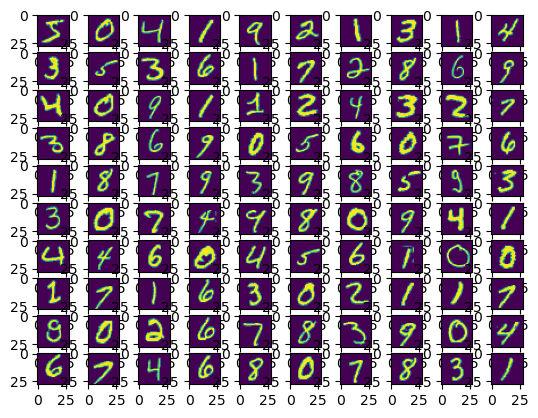

In [6]:
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k +=1  # k = k+ 1
plt.show()

In [7]:
x_train  = x_train/255
x_test = x_test/255

In [8]:
x_train[400]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#model building
model = Sequential()

In [11]:
#Import layer = Flatten Layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [12]:
#Hidden layer = Dense layer
model.add(tf.keras.layers.Dense(128 , activation = tf.keras.activations.relu))

In [13]:
#Hidden layer = Dense layer
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))

In [14]:
#Hidden layer = Dense layer
model.add(tf.keras.layers.Dense(64 , activation = tf.keras.activations.relu))

In [15]:
#output layer = Dense layer
model.add(tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax))

In [16]:
#Model Compile
model.compile(optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'])

In [17]:
#Fit Model
model_history = model.fit(x_train , y_train , epochs = 5)

Epoch 1/5


1875/1875 [==============================] - 15s 4ms/step - loss: 0.2345 - accuracy: 0.9297
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1008 - accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0558 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9856


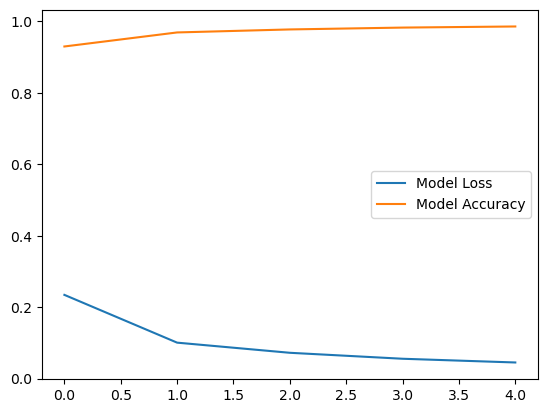

In [19]:
plt.plot(model_history.history['loss'], label='Model Loss')
plt.plot(model_history.history['accuracy'], label='Model Accuracy')
plt.legend()
plt.show()

In [20]:
#Evaluate
train_loss , train_accuracy = model.evaluate(x_train , y_train)

1875/1875 [==============================] - 9s 3ms/step - loss: 0.0412 - accuracy: 0.9861


In [21]:
train_loss

0.04122515767812729

In [22]:
train_accuracy

0.9860833287239075

In [23]:
#Test Accuracy and Test Error
test_loss , test_accuracy = model.evaluate(x_test , y_test)

313/313 [==============================] - 7s 3ms/step - loss: 0.1012 - accuracy: 0.9703


In [24]:
test_loss

0.10119723528623581

In [25]:
test_accuracy

0.970300018787384

In [80]:
###############################################################################

In [81]:
#Load Data
cifar_data = tf.keras.datasets.cifar10

In [82]:
(x_train,y_train),(x_test,y_test) = cifar_data.load_data()

In [65]:
x_train.shape

(50000, 32, 32, 3)

In [66]:
y_train.shape

(50000, 1)

In [67]:
x_test.shape

(10000, 32, 32, 3)

In [68]:
y_test.shape

(10000, 1)

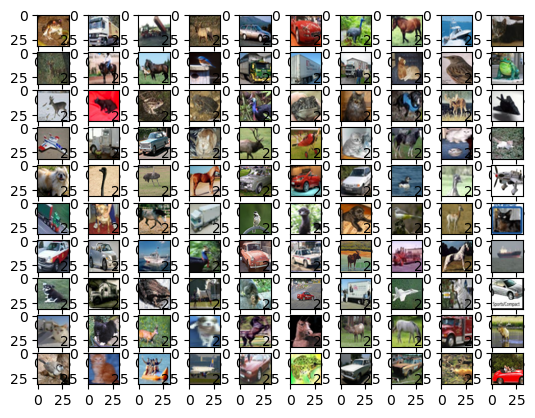

In [69]:
#Visualization
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k +=1
plt.show()

In [70]:
#Data Preprocessing
y_train[9]

array([3], dtype=uint8)

In [71]:
y_test[7]

array([6], dtype=uint8)

In [83]:
classes = len(np.unique(y_train))
classes

10

In [84]:
#Return label to Category
y_train = to_categorical(y_train , classes)
y_test = to_categorical(y_test , classes)

In [85]:
def resize_image(img):
    number_images = img.shape[0]
    new_images = np.zeros((number_images , 48,48,3))
    for i in range(number_images):
        new_images[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_images

In [86]:
x_train = resize_image(x_train)
x_test = resize_image(x_test)

In [87]:
#Scaling

In [88]:
x_train.shape

(50000, 48, 48, 3)

In [77]:
x_test.shape

(10000, 48, 48, 3)

In [90]:
x_train  = x_train/255
x_test = x_test/255

In [91]:
x_test[0]

array([[[0.00242983, 0.00172241, 0.00075356],
        [0.00242983, 0.00170704, 0.00073818],
        [0.00246059, 0.00172241, 0.0007228 ],
        ...,
        [0.00196847, 0.00141484, 0.00055363],
        [0.00186082, 0.00135333, 0.00052288],
        [0.00178393, 0.00130719, 0.0005075 ]],

       [[0.0023837 , 0.00172241, 0.00076894],
        [0.0023837 , 0.00170704, 0.0007228 ],
        [0.00239908, 0.00170704, 0.00067666],
        ...,
        [0.00195309, 0.00141484, 0.00052288],
        [0.0018762 , 0.0013687 , 0.00052288],
        [0.00181469, 0.00133795, 0.00052288]],

       [[0.00233756, 0.00172241, 0.00076894],
        [0.00232218, 0.00170704, 0.00067666],
        [0.00233756, 0.00169166, 0.00061515],
        ...,
        [0.00195309, 0.00141484, 0.00049212],
        [0.0018762 , 0.00138408, 0.0005075 ],
        [0.00183007, 0.00135333, 0.00052288]],

       ...,

       [[0.00095348, 0.00179931, 0.002599  ],
        [0.00084583, 0.00167628, 0.00244521],
        [0.00069204, 0

In [92]:
#model building
model = Sequential()

In [93]:
#Import layer = Flatten Layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [94]:
#Hidden layer = Dense layer
model.add(tf.keras.layers.Dense(128 , activation = tf.keras.activations.relu))

In [95]:
#Hidden layer = Dense layer
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))

In [96]:
#Hidden layer = Dense layer
model.add(tf.keras.layers.Dense(64 , activation = tf.keras.activations.relu))

In [97]:
#output layer = Dense layer
model.add(tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax))

In [98]:
#Model Compile
model.compile(optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'])

In [99]:
#Fit Model
model_history = model.fit(x_train , y_train , epochs = 10 , validation_split = 0.2)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\10\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\10\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\10\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\10\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\10\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\10\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(32, 48, 48, 3)


In [ ]:
plt.plot(model_history.history['loss'], label='Model Loss')
plt.plot(model_history.history['accuracy'], label='Model Accuracy')
plt.legend()
plt.show()